#### Lauren Schnepp Final Project




# The Use of Lethal Drugs by Age

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

## Introduction

Drugs are known to cause a wide range of short- and long- term side affects. In my research, I sought out to find what is the most lethal drug and how does drug consumption affect a person depending on age. This topic was particularly interesting to me because I have always been intrigued about how drugs affect a person's life, and if it affects people differently by age group. Understanding how people engage with drug use and specific substances helps agencies to create important rules, spread awareness, and allocate resources to health services. Learning about drug abuse helps cultivate programs and information to prevent drug abuse and addiction while reducing the effects that drug abuse has on individuals, their families, communities, and society as a whole. Within this notebook, I will answer the questions: What is the most lethal substance (drug)?; How does it affect a person by age group?  

## Analysis

#### Question 1: What is the most lethal substance (drug)? 

To answer this question I sought to find data from open source data frames that look at drug and alcohol-related deaths by substance. I came across a data file called Total_Number_of_Drug_Intoxication_Deaths_by_Selected_Substances__2007-2016.csv, that looks at the total number of intoxicated related deaths by substances in Maryland. In this notebook, I tried to analyze which substance was the most lethal and how usage has changed over the course of 6 years, from 2010-2016.  

In [2]:
# load and investigate the data 
substances_df = pd.read_csv('../data/Total_Number_of_Drug_Intoxication_Deaths_by_Selected_Substances__2007-2016.csv')

I decided to narrow my scope to investigate deaths from 2010-2016 and renamed columns to make it easier to read and use within the notebook. 

In [3]:
# subset data frame to look at years 2010 - 2016 
substances_df = substances_df.loc[2:9]

In [4]:
#renaming the columns to fit my preferences and for ease when coding: 
sname_dict = {
    "Calendar Year": "calendar_yr", 
    "Heroin Deaths": "heroin_deaths", 
    "Prescription Opioid Deaths": "opioid_deaths", 
    "Alcohol Deaths": "alcohol_deaths", 
    "Benzodiazepine Deaths": "benzo_deaths", 
    "Cocaine Deaths": "cocaine_deaths",
    "Fentanyl Deaths": "fentanyl_deaths"
}

In [5]:
substances_df = substances_df.rename(columns=sname_dict)

Next, I took the mean and sum of deaths for each year to determine if there is an increase or decrease in deaths as from 2010-2016.  

In [6]:
#create a list of columns that you want to mean
colstouse = ['heroin_deaths', 'opioid_deaths', 'alcohol_deaths',
       'benzo_deaths', 'cocaine_deaths', 'fentanyl_deaths']

#select these columns and take a mean of each row
substances_df['total_sum'] = substances_df[colstouse].sum(axis=1)
substances_df['total_mean'] = substances_df[colstouse].mean(axis=1)

In [7]:
substances_df[['calendar_yr', 'total_sum']].sort_values('calendar_yr')

,calendar_yr,total_sum
6,2007,1199
2,2010,941
3,2011,992
4,2012,1153
5,2013,1299
7,2014,1665
8,2015,2061
9,2016,3920


Table by Lauren Schnepp; Source: https://catalog.data.gov/dataset/total-number-of-drug-intoxication-deaths-by-selected-substances-2007-2016

I then created a bar graph to help visualize how total deaths have changed from 2010-2016. 

Text(0, 0.5, 'Amount of Deaths')

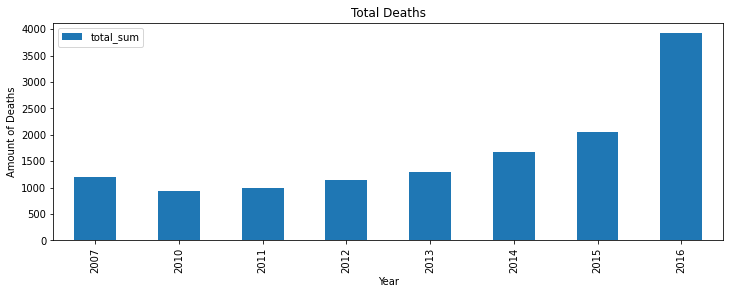

In [8]:
total_df=substances_df[['calendar_yr','total_sum']]

total_df.sort_values('calendar_yr').plot(x='calendar_yr', y='total_sum', kind='bar', figsize=(12,4))
plt.title('Total Deaths')
plt.xlabel('Year')
plt.ylabel('Amount of Deaths')

Graph by Lauren Schnepp; Source: https://catalog.data.gov/dataset/total-number-of-drug-intoxication-deaths-by-selected-substances-2007-2016

As you can see in the bar plot above, deaths have increased every year from 2010-2016. It is important to mention that 2007 is in this graph, but I am not using it in my analysis. 
* In 2010 941 people died from drug use, while in 2016 3920 people died from drug use. This is a huge increase and suggests that drug use has increased since 2010. 

#### Generalized Findings: 
From looking at data in substances_df, the most deaths were caused by Heroin and Fentanyl, followed by alcohol and cocaine. Shown in the graphs bellow, deaths related to these four substances have increased dramatically over the course of 6 years. 

Text(0, 0.5, 'number of deaths')

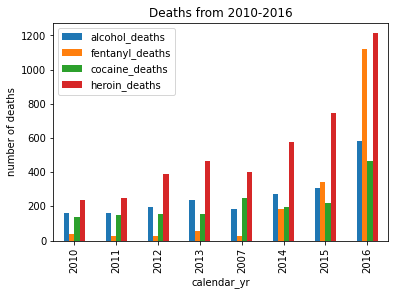

In [9]:
substances_df.iloc[0:14][['calendar_yr','alcohol_deaths','fentanyl_deaths','cocaine_deaths','heroin_deaths' ]].plot(kind='bar', x='calendar_yr')
plt.title('Deaths from 2010-2016')
plt.ylabel('number of deaths')

Graph by Lauren Schnepp; Source: https://catalog.data.gov/dataset/total-number-of-drug-intoxication-deaths-by-selected-substances-2007-2016

I decided to use outside sources to investigate how lethal are these drugs and what are their side affects. 

##### Alcohol (Murray, 2020)
* Alcohol is said to be responsible for 88,000 US deaths annually. 
* Side effects: slurred speech, blacking out, liver disease, and comas. 
* Long-term use side effects: brain damage, kidney and liver damage, financial loss, poor memory, cancer, higher risk of assault, irritability, alcohol withdrawal and Delirium Tremens, and sometimes death. 

##### Fentanyl (Murray, 2020)
* In 2016, fentanyl was reported to have killed 18,335 people, which is equal to 28.8% of deaths due to drug abuse.
* Side effects: increased sense of euphoria, confusion, constipation, difficulty concentrating, dry mouth, flushed skin and sweating, intense drowsiness and fatigue, loss of consciousness, nausea and vomiting, pinpoint pupils, slowed breathing, slowed heart rate, weakness, and death. 

##### Heroin (Murray, 2020)
* The CDC reported that Heroin killed 4,454 people in 2011, and increased to 15,961 deaths by 2016. That is a huge increase and suggests that either the frequency of heroin use has increased, or the amount used has increased. 
* Overdose symptoms: blueish lips, shallow breathing, convulsions, comas, and sometimes death. 

##### Cocaine (Murray, 2020)
* Cocaine has been gaining popularity since the 1970's. In 2011, there were 5,070 deaths related to cocaine; and in 2016 11,316 people died from cocaine use. 
* Side effects of cocaine abuse: cardiac arrest, convulsions, stroke, and death. 
* Other side affects: feelings of paranoia, excitability, extreme weight loss, anxiety, and depression.


From the data I have collected from the data in my notebook initial_data_analysis containing the data frame Total_Number_of_Drug_Intoxication_Deaths_by_Selected_Substances__2007-2016.csv, the most lethal substances are alcohol, fentanyl, heroin, and cocaine. 

#### Question 2: How do these drugs affect a person by age group? 

To investigate this question, I decided to look for a data frame that looks at drug use by age to see which age group engages in drug use the most, and how drug use changes with age. I will also be looking at which age engages most with the four most lethal drugs found by answering my first research question. I will be focusing on alcohol and cocaine use, because these drugs overlap in the data frame with the four lethal drugs found by answering the first research question. In my further_data_analysis notebook, I examined the data frame drug-use-by-age.csv that looks at use of substances by age. The age range is from 12yo to 65+yo. 

In [10]:
# load and investigate the data 
du_df = pd.read_csv('../data/drug-use-by-age.csv')

In [11]:
#renaming the columns to fit my preferences and for ease when coding: 
duname_dict = {
    "alcohol-use": "alcohol_use", 
    "alcohol-frequency": "alcohol_frequency", 
    "marijuana-use": "marijuana_use", 
    "marijuana-frequency": "marijuana_frequency", 
    "cocaine-use": "cocaine_use", 
    "cocaine-frequency": "cocaine_frequency", 
    "crack-use": "crack_use", 
    "crack-frequency": "crack_frequency",
    "oxycontin-use": "oxycontin_use", 
    "oxycontin-frequency": "oxycontin_frequency", 
    "tranquilizer-use": "tranquilizer_use", 
    "tranquilizer-frequency": "tranquilizer_frequency", 
    "stimulant-use": "stimulant_use", 
    "stimulant-frequency": "stimulant_frequency", 
    "meth-use": "meth_use", 
    "meth-frequency": "meth_frequency", 
    "sedative-use": "sedative_use", 
    "sedative-frequency": "sedative_frequency" 
}
du_df = du_df.rename(columns=duname_dict)

It is important to note that use is the percentage of those in an age group who used a specific substance in the past 12 months; and frequency is the median number of times a person used a specific substance in the past 12 months. 

I will be looking at four different age ranges: 12-17, 18-25, 25-64, and 65+ and look at their consumption of specific drugs. 

##### Age Range: 12-17

In [12]:
du_df.iloc[0:6][['age', 'alcohol_use', 'cocaine_use']]

,age,alcohol_use,cocaine_use
0,12,3.9,0.1
1,13,8.5,0.1
2,14,18.1,0.1
3,15,29.2,0.5
4,16,40.1,1.0
5,17,49.3,2.0


Graph by Lauren Schnepp; Source: https://github.com/fivethirtyeight/data/blob/b8389d975c2fca22997037b811547d41175b26a3/drug-use-by-age/drug-use-by-age.csv

Alcohol use increases substantially from age 12 to 17. This table shows that 3.9% of 12 year olds engaged with alcohol, while 49.3% of 17 year olds have used alcohol within the past 12 months. 

Cocaine use also increases, but at a much less rate than alcohol. 0.1% of 12 year olds have used cocaine in the past 12 months, compared to 2% of 17 year olds. 

This graph helps visualize how alcohol use and cocaine use increases from age 12-17, with the exception of alcohol use being lower in the 14 year age group than the 13 year age group. 

##### Age Range: 18-25

In [13]:
du_df.iloc[6:12][['age', 'alcohol_use', 'cocaine_use']]

,age,alcohol_use,cocaine_use
6,18,58.7,3.2
7,19,64.6,4.1
8,20,69.7,4.9
9,21,83.2,4.8
10,22-23,84.2,4.5
11,24-25,83.1,4.0


Graph by Lauren Schnepp; Source: https://github.com/fivethirtyeight/data/blob/b8389d975c2fca22997037b811547d41175b26a3/drug-use-by-age/drug-use-by-age.csv

 Alcohol use increases dramatically from those who are 18 years old to those who are 24-25. The biggest jump in usage is from 20 to 21 years old. This is possibly due to the legal drinking age being 21 in the United States. However, it is important to note that alcohol usage decreases from the age group 22-23 to 24-25; 84.2% of 22-23 year olds used alcohol over the past 12 months, compared 83.1% of 24-25 year olds. Cocaine use also increased from age 18 to 20, and then slowly declined in usage as the age group increases. 

##### Age Range: 26 - 64

In [14]:
du_df.iloc[12:16][['age', 'alcohol_use', 'cocaine_use']]

,age,alcohol_use,cocaine_use
12,26-29,80.7,3.2
13,30-34,77.5,2.1
14,35-49,75.0,1.5
15,50-64,67.2,0.9


Graph by Lauren Schnepp; Source: https://github.com/fivethirtyeight/data/blob/b8389d975c2fca22997037b811547d41175b26a3/drug-use-by-age/drug-use-by-age.csv

Alcohol usage declines from age group 26-29 to 50-64 by over 10%. As the age group increases, alcohol usage decreases. Cocaine usage decreases as the age group gets older, which is supportive of the findings in the age range 18-25 that cocaine usage decreases with age. 

##### Age Range: 65+ 

In [15]:
du_df.iloc[15:17][['age', 'alcohol_use', 'cocaine_use']]

,age,alcohol_use,cocaine_use
15,50-64,67.2,0.9
16,65+,49.3,0.0


Graph by Lauren Schnepp; Source: https://github.com/fivethirtyeight/data/blob/b8389d975c2fca22997037b811547d41175b26a3/drug-use-by-age/drug-use-by-age.csv

When investigating this age category, I utilized the last age group in the last age range to be able to compare alcohol and cocaine use. Compared to the age group 50-64, alcohol use declines for those aged 65+. This table also shows that those aged 65+ have no used cocaine in the past 12 months. 

#### Generalized Findings: 
* Alcohol use increases from age 12 - 22-23 years old, then decreases at 24-25 years old and continues to decrease across age groups. 
* Cocaine usage increases from age 12-21, then begins to decrease, with more rapid decrease in usage occurring after 22-23 years old. It is important to note that the data shows that those who are 65+ do not use cocaine. 

## Discussion

Over the course of my analysis, I have analyzed data that helps answers my research questions: What is the most lethal substance (drug)?; How do these drugs affect a person's health by age group? So far, I have found that the substances that lead to the most deaths are fentanyl, cocaine, heroin, and alcohol. I then investigated the usage of two of these lethal drugs, alcohol and cocaine, by four age groups: 12-17, 18-25, 25-64, and 65+ to compare how different age groups consume these potentially lethal drugs. Since my data shows that drug and alcohol use continues to decline after the ages 24-25, I will be focusing on age groups that have the highest usage, and thus, the most vulnerable to develop an addiction. 

There are a various  factors that lead individuals to be vulnerable to drug addiction. These factors include the environment of an individual, personality traits, education levels, and familial bond Christiansen, 2020). An important factor that I will be focusing on that is crucial to understanding drug addiction is age. Age plays a crucial part in affecting the susceptibility of an individual to addiction, as well as the kind of drugs the individual is likely to use. It is known that drug addiction usually emerges at a young age, with the highest rates of addiction seen in adolescents and young adults (Christiansen, 2020). Young adults are thought to be between the ages of 18 and 25, while adolescents are considered to be under 18. When considering my data in my further_data_analysis notebook, we can see that drug use increases from age 12 to 22-23, then drops off at ages 24-25 and continues to decline as the age group gets older. 
This graph demonstrates the progression of increased use of substances (cocaine, alcohol) as the age group gets older, then drops off at the end of young adulthood (24-25 years old).

Text(0, 0.5, 'Use')

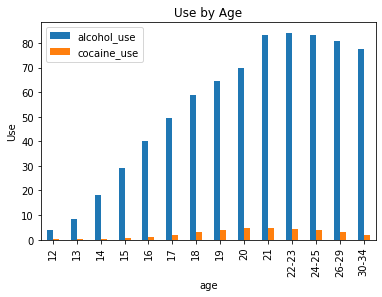

In [16]:
du_df.iloc[0:14][['age', 'alcohol_use', 'cocaine_use']].plot(kind='bar', x='age')
plt.title('Use by Age')
plt.ylabel('Use')

Graph by Lauren Schnepp; Source: https://github.com/fivethirtyeight/data/blob/b8389d975c2fca22997037b811547d41175b26a3/drug-use-by-age/drug-use-by-age.csv

* Note: use is the percentage of those in an age group who used a specific substance in the past 12 months

It is important to consider the age of onset of drug use because early-onset of substance use is demonstrated by a higher likelihood of harder substance use in the future (Christiansen, 2020), such as the four most lethal drugs (alcohol, cocaine, fentanyl, and heroin) found in my initial_data_analysis notebook. It is crucial for researchers, doctors, and mental health services/agencies to understand which age group is most susceptible to developing drug addictions as well as which drug is most lethal, to be able to intervene early to prevent risks associated with drug abuse, and decrease lives lost to drugs. 

## Conclusion

Although I have answered these questions throughout my project, I want to clearly express my findings to each of the research questions I sought out to answer. 

Question 1: What is the most lethal substance (drug)?
* The drugs that resulted in the most deaths are heroin, fentanyl, alcohol, and cocaine. 

Question 2: How do these drugs affect a person by age group?
* Alcohol and drug use seem to increase in use until the end of young adulthood, and then decreases as one gets older.

## References

Christiansen, T. (2020, November 4). How Age Affects Drug Addiction. The Recovery Village Drug and Alcohol Rehab. https://www.therecoveryvillage.com/drug-addiction/related-topics/affects-age/. 

Murray, K. (2020, April 28). The Top 10 Most Dangerous Drugs. Rehab Spot. https://www.rehabspot.com/drugs/the-top-10-most-dangerous-drugs/. 